In [132]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt



# Exercise 1



A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

    What is the probability that no cars drive up in the noon hour?
    What is the probability that 3 or more cars come through the drive through?
    How likely is it that the drive through gets at least 1 car?



Text(0, 0.5, 'P(x)')

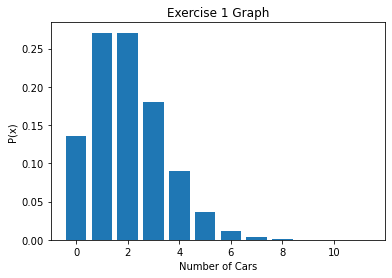

In [9]:
cars_mean = 2

x = np.arange(0,12)
y = stats.poisson(cars_mean).pmf(x)

plt.bar(x, y)
plt.title('Exercise 1 Graph')
plt.xlabel('Number of Cars')
plt.ylabel('P(x)')

## Experimental - Part 1

In [21]:
# What is the probability that no cars drive up in the noon hour?

answer = stats.poisson(cars_mean).pmf(0)

print(f'There is a {round((answer*100), 2)}% chance that no cars drive up at noon.')

There is a 13.53% chance that no cars drive up at noon.


## Theoretical - Part 1

In [55]:
# What is the probability that no cars drive up in the noon hour?
# simulate with random

#represent and make a matrix
cars = np.random.poisson(2, 10_000*1).reshape(10_000, 1)

df = pd.DataFrame(cars)

df['no_cars'] = df[0] == 0

answer = df.no_cars.mean()

print(f'There is a {round((answer*100), 2)}% chance that no cars drive up at noon.')

There is a 13.56% chance that no cars drive up at noon.


## Experimental - Part 2

In [22]:
# What is the probability that 3 or more cars come through the drive through?

answer = stats.poisson(cars_mean).sf(2)

print(f'There is a {round((answer*100), 2)}% chance that 3 or more cars drive through the drive through.')

There is a 32.33% chance that 3 or more cars drive through the drive through.


## Theoretical - Part 2

In [56]:
# What is the probability that 3 or more cars come through the drive through?

df = pd.DataFrame(cars)

df['three_plus'] = df[0] > 2

answer = df.three_plus.mean()

print(f'There is a {round((answer*100), 2)}% chance that 3 or more cars drive through the drive through.')

There is a 32.04% chance that 3 or more cars drive through the drive through.


## Experimental - Part 3

In [23]:
# How likely is it that the drive through gets at least 1 car?

answer = stats.poisson(cars_mean).sf(0)

print(f'There is a {round((answer*100), 2)}% chance that at least one car will drive through the drive through')

There is a 86.47% chance that at least one car will drive through the drive through


## Theoretical - Part 3

In [57]:
# How likely is it that the drive through gets at least 1 car?

df = pd.DataFrame(cars)

df['one_plus'] = df[0] > 0

answer = df.one_plus.mean()

print(f'There is a {round((answer*100), 2)}% chance that at least one car will drive through the drive through')

There is a 86.44% chance that at least one car will drive through the drive through


# Exercise 2



Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

    What grade point average is required to be in the top 5% of the graduating class?
    
    What GPA constitutes the bottom 15% of the class?
    
    An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?
    
    If I have a GPA of 3.5, what percentile am I in?

## Experimental - Part 1

In [35]:
# What grade point average is required to be in the top 5% of the graduating class?


# gpa_mean = 3
# std_dev = 0.3

answer = stats.norm(3, .3).isf(.05)

print(f'To be in the top 5% of the class you need a {round(answer, 1)} GPA.')

To be in the top 5% of the class you need a 3.5 GPA.


## Theoretical - Part 1

In [66]:
# What grade point average is required to be in the top 5% of the graduating class?

gpa = np.random.normal(3, .3, 10_000*1).reshape(10_000, 1)

df = pd.DataFrame(gpa)

# how to make a column to filter with? .sort? cut into deciles(preparing for later question)? 
# cut out relevent data (cut into deciles, preparing for later question)
#df['decile'] = pd.qcut(df[0], q = 10, labels = False)

#df = df[df['decile'] == 9]
# * doesnt work with decile *

df['percentile'] = pd.qcut(df[0], q = 20, labels = False)

df = df[df['percentile'] == 19]

answer = df[0].min()

print(f'To be in the top 5% of the class you need a {round(answer, 1)} GPA.')

To be in the top 5% of the class you need a 3.5 GPA.


## Experimental - Part 2

In [36]:
# What GPA constitutes the bottom 15% of the class?

answer = stats.norm(3, .3).ppf(.15)

print(f'The bottom 15% of the class has a GPA lower than {round(answer, 1)}.')

The bottom 15% of the class has a GPA lower than 2.7.


## Theoretical - Part 2


In [70]:
# What GPA constitutes the bottom 15% of the class?

df = pd.DataFrame(gpa)

df['percentile'] = pd.qcut(df[0], q = 20, labels = False)

df = df[df['percentile'] == 3]

answer = df[0].max()

print(f'The bottom 15% of the class has a GPA lower than {round(answer, 2)}.')

The bottom 15% of the class has a GPA lower than 2.74.


## Experimental - Part 3

In [69]:
# An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. 
# Determine the range of the third decile.

# --- a quick google search confirms that the 3rd decile would be the 20-30 percentile

# Would a student with a 2.8 grade point average qualify for this scholarship?

answer1 = stats.norm(3, .3).ppf(.2)
answer2 =stats.norm(3, .3).ppf(.3)

print(f'A GPA between {round(answer1, 2)} and {round(answer2, 2)} will earn part of the eccentric scholarship. A GPA of 2.8 will qualify.')

A GPA between 2.75 and 2.84 will earn part of the eccentric scholarship. A GPA of 2.8 will qualify.


## Theoretical - Part 3

In [76]:
# Would a student with a 2.8 grade point average qualify for this scholarship?

df = pd.DataFrame(gpa)

df['decile'] = pd.qcut(df[0], q = 10, labels = False)

df = df[df['decile'] == 2]

answer1 = df[0].min()
answer2 = df[0].max()

print(f'A GPA between {round(answer1, 2)} and {round(answer2, 2)} will earn part of the eccentric scholarship. A GPA of 2.8 will qualify.')

A GPA between 2.74 and 2.84 will earn part of the eccentric scholarship. A GPA of 2.8 will qualify.


## Experimental - Part 4

In [42]:
# If I have a GPA of 3.5, what percentile am I in?

answer = stats.norm(3, .3).cdf(3.5)

print(f' A GPA of 3.5 would place me in the {round((answer*100), 0)} percentile of the class.')

 A GPA of 3.5 would place me in the 95.0 percentile of the class.


## Theoretical - Part 4

In [49]:
# If I have a GPA of 3.5, what percentile am I in?

answer = (np.random.normal(3, .3, 10_000) < 3.5).mean()

print(f' A GPA of 3.5 would place me in the {round((answer*100), 0)} percentile of the class.')

 A GPA of 3.5 would place me in the 95.0 percentile of the class.


# Exercise 3

A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

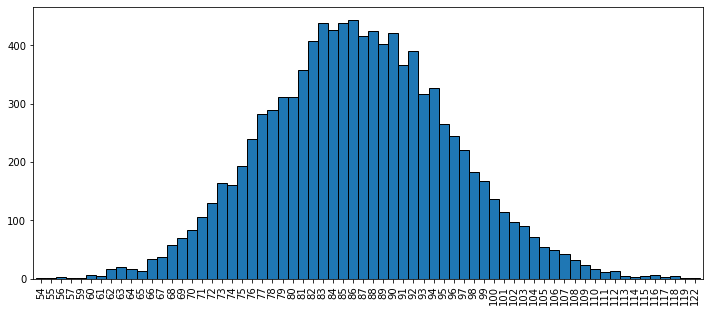

In [43]:
# click_rate = .02 = p
# visitors = 4326 = n

pd.Series(stats.binom(4326, .02).rvs(10_000)).value_counts().sort_index().plot.bar(figsize=(12, 5), width=1, ec='black')
plt.show()

## Experimental 

In [48]:
# A marketing website has an average click-through rate of 2%. 
# One day they observe 4326 visitors and 97 click-throughs. 
# How likely is it that this many people or more click through?

answer = stats.binom(4326, .02).sf(96)

print(f' There was a {round((answer*100), 2)}% chance to get 97 click-throughs.')

 There was a 13.98% chance to get 97 click-throughs.


## Theoretical 

In [81]:
# A marketing website has an average click-through rate of 2%. 
# One day they observe 4326 visitors and 97 click-throughs. 
# How likely is it that this many people or more click through?

clicks = np.random.choice([0, 1], size = (10_000, 4326), p = (.98, .02))

answer = (clicks.sum(axis=1) >= 97).mean()

print(f' There was a {round((answer*100), 2)}% chance to get 97 click-throughs.')

 There was a 13.81% chance to get 97 click-throughs.


# Exercise 4

You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

    What is the probability that at least one of your first 60 answers is correct?


## Experimental 

In [86]:
# What is the probability that at least one of your first 60 answers is correct?

# prob of 1 in 100 questions
p = .01
# withing the first 60 questions
n = 60

answer = stats.binom(60, .01).sf(0)

print(f'There is a {round((answer*100), 2)}% chance to get at least 1 in the first 60 correct')

There is a 45.28% chance to get at least 1 in the first 60 correct


## Theoretical 

In [88]:
# What is the probability that at least one of your first 60 answers is correct?

guesses = np.random.choice([True, False], 10_000*60, p=[.01,.99]).reshape(10_000, 60) 

df = pd.DataFrame(guesses)

df['got_lucky'] = df.sum(axis=1) > 0

answer = df['got_lucky'].mean()

print(f'There is a {round((answer*100), 2)}% chance to get at least 1 in the first 60 correct')

There is a 45.31% chance to get at least 1 in the first 60 correct


# Exercise 5

The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. 

How likely is it that the break area gets cleaned up each day? 

How likely is it that it goes two days without getting cleaned up? 

All week?

## Experimental - Part 1

In [90]:
# How likely is it that the break area gets cleaned up each day?

n = .9 * (3 * 22)
p = .03

#not practical to type equation out again
answer = stats.binom(n, p).sf(0)

print(f'There is a {round((answer*100), 2)}% chance the break area got cleaned')

There is a 83.62% chance the break area got cleaned


## Theoretical - Part 1

In [105]:
# How likely is it that the break area gets cleaned up each day?

got_cleaned = np.random.binomial(n, p, 10_000 * 1).reshape(10_000, 1)

df = pd.DataFrame(got_cleaned)

df['not_clean'] = df.sum(axis=1) == 0

answer = df['not_clean'].mean()

# realized i calculated the chance it will be dirty, not the chance it would get cleaned
# corrected in the f'statment

print(f'There is a {round((100 - (answer*100)), 2)}% chance the break area got cleaned')

There is a 83.42% chance the break area got cleaned


## Experimental - Part 2

In [111]:
# How likely is it that it goes two days without getting cleaned up?

answer = stats.binom((n * 2), p).pmf(0)

print(f'There is a {round((answer*100), 2)}% chance the break area got neglected for 2 days.')

There is a 2.68% chance the break area got neglected for 2 days.


## Theoretical - Part 2

In [113]:
# How likely is it that it goes two days without getting cleaned up?

got_cleaned = np.random.binomial(n, p, 10_000 * 2).reshape(10_000, 2)

df = pd.DataFrame(got_cleaned)

df['not_clean'] = df.sum(axis=1) == 0

answer = df['not_clean'].mean()

print(f'There is a {round((answer*100), 2)}% chance the break area got neglected.')

There is a 2.61% chance the break area got neglected.


## Experimental - Part 3

In [116]:
# All week?
# n * 5 (5 for mon - fri)

answer = stats.binom((n * 5), p).pmf(0)

print(f'There is a {round((answer*100), 2)}% chance the break area got neglected for a full school week.')

There is a 0.01% chance the break area got neglected for a full school week.


## Theoretical - Part 3

In [119]:
# All week?

got_cleaned = np.random.binomial(n, p, 10_000 * 5).reshape(10_000, 5)

df = pd.DataFrame(got_cleaned)

df['not_clean'] = df.sum(axis=1) == 0

answer = df['not_clean'].mean()

print(f'There is a {round((answer*100), 2)}% chance the break area got neglected for a full school week.')

There is a 0.01% chance the break area got neglected for a full school week.


# Exercise 6

You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

## Experimental

In [129]:
mean = 15 * 2

std_dev = 3 * 2

#  20 = 60(lunch_hour) - 30(15 people*2 min each) - 10(wait time)

answer = stats.norm(mean, std_dev).cdf(20)

print(f'There is a {round(answer, 2)}% chance that I will have time to eat.')

There is a 0.05% chance that I will have at 15


## Theoretical

In [130]:
# quick string

answer = (np.random.normal(30, 6, 10_000) <= 20).mean()

print(f'There is a {round(answer, 2)}% chance that I will have time to eat.')

There is a 0.05% chance that I will have time to eat.


# Exercise 7


Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

    What percent of employees earn less than 60,000?
    What percent of employees earn more than 95,000?
    What percent of employees earn between 65,000 and 80,000?
    What do the top 5% of employees make?

## Experimental - Part 1

In [177]:
# gotta access the database

import env

url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'
query = '''
SELECT *
FROM salaries s
WHERE s.to_date > NOW()
'''
salaries = pd.read_sql(query, url)

<AxesSubplot:>

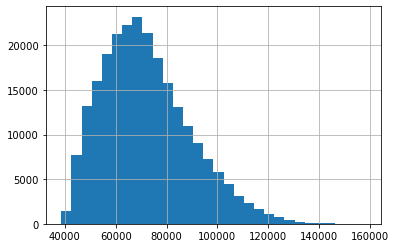

In [142]:
salaries.salary.hist(bins = 30)

In [144]:
# What percent of employees earn less than 60,000?

mean = salaries.salary.mean()

std_dev = salaries.salary.std()

answer = stats.norm(mean, std_dev).cdf(60_000)

print(f'Only {round((answer*100), 2)}% of employees earn less than $60,000.')

Only 24.39% of employees earn less than $60,000.


## Theoretical - Part 1

In [153]:
# What percent of employees earn less than 60,000?

answer = len(salaries[salaries.salary < 60_000]) / len(salaries)

print(f'Only {round((answer*100), 2)}% of employees earn less than $60,000.')

Only 27.06% of employees earn less than $60,000.


## Experimental - Part 2

In [146]:
# What percent of employees earn more than 95,000?

answer = stats.norm(mean, std_dev).sf(95_000)

print(f'Only {round((answer*100), 2)}% of employees earn more than $95,000.')

Only 9.21% of employees earn more than $95,000.


## Theoretical - Part 2

In [154]:
# What percent of employees earn more than 95,000?

answer = len(salaries[salaries.salary > 95_000]) / len(salaries)

print(f'Only {round((answer*100), 2)}% of employees earn more than $95,000.')

Only 10.86% of employees earn more than $95,000.


## Experimental - Part 3

In [160]:
# What percent of employees earn between 65,000 and 80,000?

more_than = stats.norm(mean, std_dev).cdf(65_000)

less_than = stats.norm(mean, std_dev).cdf(80_000)

answer = less_than - more_than

print(f'A total of {round((answer*100), 2)}% of employees earn between $65,000 and $80,000.')

A total of 33.51% of employees earn between $65,000 and $80,000.


## Theoretical - Part 3

In [159]:
# What percent of employees earn between 65,000 and 80,000?

more_than = len(salaries[salaries.salary < 65_000]) / len(salaries)

less_than = len(salaries[salaries.salary < 80_000]) / len(salaries)

answer = less_than - more_than

print(f'A total of {round((answer*100), 2)}% of employees earn between $65,000 and $80,000.')

A total of 32.51% of employees earn between $65,000 and $80,000.


## Experimental - Part 4

In [179]:
# What do the top 5% of employees make?

answer = stats.norm(mean, std_dev).isf(0.05)

print(f'The top 5% of salaries earn at least ${round(answer, 2)}')

The top 5% of salaries earn at least $100484.64


## Theoretical - Part 4

In [178]:
# What do the top 5% of employees make?

salaries['percent'] = pd.qcut(salaries['salary'], q=20, labels=False)

salaries = salaries[salaries['percent'] == 19]

answer = salaries['salary'].min()

print(f'The top 5% of salaries earn at least ${round(answer, 2)}')

The top 5% of salaries earn at least $104226
